In [17]:
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import glob
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from yellowbrick.cluster import KElbowVisualizer

/Users/alyssa/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#grab wrangled data files
transcripts = glob.glob('../data/Trump/*.txt')

In [8]:
#separate into training/testing by fraction
trainFrac = int(len(transcripts)*0.85)

training = transcripts[:trainFrac]
testing = transcripts[trainFrac:]

In [9]:
#get bag of words for each speech in training and
#testing datasets
training_speeches = []
for i in range(len(training)):
    speech = open(training[i],'r')
    words = []
    for line in speech:
        words += word_tokenize(line)
    seperator = ' '
    training_speeches.append(seperator.join(words))

testing_speeches = []
for i in range(len(testing)):
    speech = open(testing[i],'r')
    words = []
    for line in speech:
        words += word_tokenize(line)
    sperator = ' '
    testing_speeches.append(seperator.join(words))
    

In [48]:
#format bag of words
cv = CountVectorizer(analyzer = 'word', max_features = 50, lowercase=True, preprocessor=None, tokenizer=None, stop_words = 'english')  
training_vectors = cv.fit_transform(training_speeches)
testing_vectors = cv.fit_transform(testing_speeches)

training_classification = []
prediction = []


#cycle through k-means for 3-10 clusters
for k in range(2,12):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 0)
    kmeans_indices = kmeans.fit_predict(training_vectors)
    training_classification.append(kmeans_indices)
    predicted_indices = kmeans.predict(testing_vectors)
    prediction.append(predicted_indices)
 
    k += 1
    




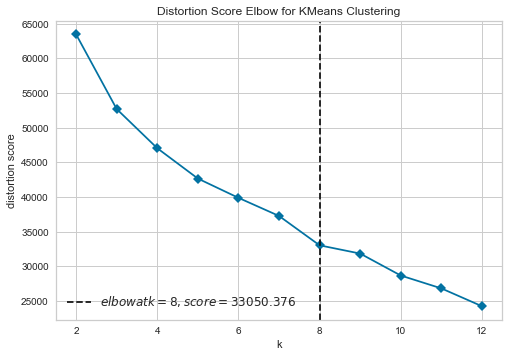

In [49]:
visualizer = KElbowVisualizer(kmeans,k=(2,13), timings=False)
visualizer.fit(training_vectors)
visualizer.show()
#elbow is at 8

Optimal is 8 clusters

In [41]:
print(training_classification[7])
print(predicted_indices[7])

[2 6 0 6 0 8 2 4 6 2 2 0 7 5 6 1 5 0 2 5 6 0 0 0 2 2 6 2 3 7 6 0 2 0 6 2 6
 6 6 6 2 5 6 2 6]
3


In [54]:
kmeans = KMeans(n_clusters = 8, init = 'k-means++', random_state = 0)
kmeans_indices = kmeans.fit_predict(training_vectors)
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()
for i in range(8):
    print("Cluster %d: " % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

Cluster 0: 
 god
 deal
 opportunity
 going
 things
 jobs
 numbers
 years
 time
 think
Cluster 1: 
 tony
 nation
 years
 deal
 god
 family
 world
 think
 tremendous
 school
Cluster 2: 
 god
 things
 deal
 love
 going
 really
 opportunity
 time
 jobs
 think
Cluster 3: 
 god
 really
 opportunity
 going
 deal
 good
 things
 years
 come
 million
Cluster 4: 
 god
 incredible
 time
 things
 numbers
 need
 deal
 think
 going
 right
Cluster 5: 
 years
 god
 things
 love
 think
 going
 deal
 jobs
 numbers
 school
Cluster 6: 
 really
 god
 things
 going
 numbers
 world
 school
 love
 opportunity
 deal
Cluster 7: 
 god
 years
 new
 going
 things
 opportunity
 love
 job
 came
 deal
